In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


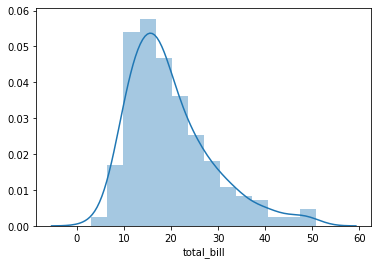

In [3]:
sns.distplot(df['total_bill'])

In [4]:
df['SQRT TB'] = np.sqrt(df['total_bill'])
df['LOG TB'] = np.log(df['total_bill'])
df

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,3.202340
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,5.387950,3.368330
240,27.18,2.00,Female,Yes,Sat,Dinner,2,5.213444,3.302481
241,22.67,2.00,Male,Yes,Sat,Dinner,2,4.761302,3.121042
242,17.82,1.75,Male,No,Sat,Dinner,2,4.221374,2.880321


In [5]:
print('The skewness of original data is ',df['total_bill'].skew())
print('The skewness of square rooted data is ',df['SQRT TB'].skew())
print('The skewness of log data is ',df['LOG TB'].skew())
print('The kurtosis of original data is ',df['total_bill'].kurt())
print('The kurtosis of square rooted data is ',df['SQRT TB'].kurt())
print('The kurtosis of log data is ',df['LOG TB'].kurt())

The skewness of original data is  1.1332130376158205
The skewness of square rooted data is  0.5661281592596766
The skewness of log data is  -0.11623079290253824
The kurtosis of original data is  1.2184840156638854
The kurtosis of square rooted data is  0.19520953466627722
The kurtosis of log data is  0.4734793671474513


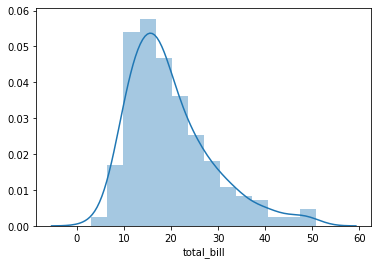

In [6]:
sns.distplot(df['total_bill'])

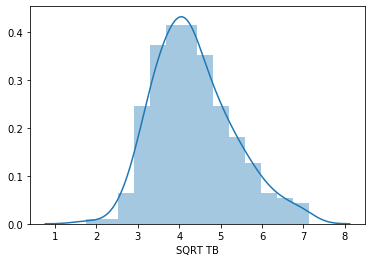

In [7]:
sns.distplot(df['SQRT TB'])

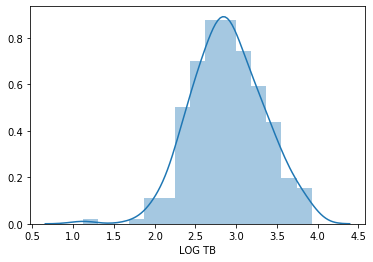

In [8]:
sns.distplot(df['LOG TB'])

In [9]:
q1 = df['total_bill'].quantile(q=0.25)
q2 = df['total_bill'].quantile(q=0.5)
q3 = df['total_bill'].quantile(q=0.75)
IQR = q3 - q1
ll = q1 - (1.5*IQR)
ul = q3 + (1.5*IQR)

In [10]:
df[(df['total_bill']<ll) | (df['total_bill']>ul)]

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB
59,48.27,6.73,Male,No,Sat,Dinner,4,6.947661,3.876810
102,44.30,2.50,Female,Yes,Sat,Dinner,3,6.655825,3.790985
142,41.19,5.00,Male,No,Thur,Lunch,5,6.417944,3.718196
156,48.17,5.00,Male,No,Sun,Dinner,6,6.940461,3.874736
170,50.81,10.00,Male,Yes,Sat,Dinner,3,7.128113,3.928093
182,45.35,3.50,Male,Yes,Sun,Dinner,3,6.734241,3.814410
184,40.55,3.00,Male,Yes,Sun,Dinner,2,6.367888,3.702536
197,43.11,5.00,Female,Yes,Thur,Lunch,4,6.565821,3.763755
212,48.33,9.00,Male,No,Sat,Dinner,4,6.951978,3.878052


In [11]:
df2 = df[(df['total_bill']>ll) & (df['total_bill']<ul)] #cleaned data without outliers
df2

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,3.202340
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,5.387950,3.368330
240,27.18,2.00,Female,Yes,Sat,Dinner,2,5.213444,3.302481
241,22.67,2.00,Male,Yes,Sat,Dinner,2,4.761302,3.121042
242,17.82,1.75,Male,No,Sat,Dinner,2,4.221374,2.880321


In [12]:
print('The skewness of original data is ',df['total_bill'].skew())
print('The skewness of cleaned data is ',df2['total_bill'].skew())
print('The kurtosis of original data is ',df['total_bill'].kurt())
print('The kurtosis of cleaned data is ',df2['total_bill'].kurt())


The skewness of original data is  1.1332130376158205
The skewness of cleaned data is  0.7255976389840281
The kurtosis of original data is  1.2184840156638854
The kurtosis of cleaned data is  0.050898514819063934


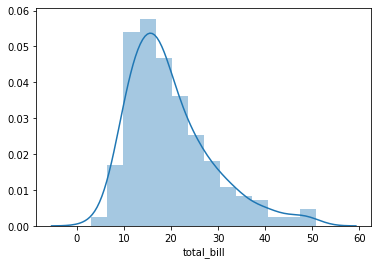

In [13]:
sns.distplot(df['total_bill'])

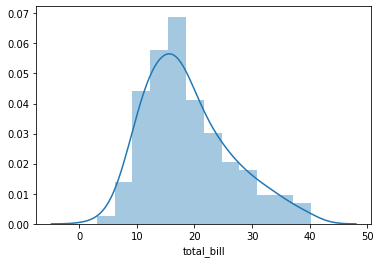

In [14]:
sns.distplot(df2['total_bill'])

In [15]:
from scipy.stats import zscore

In [16]:
df['zscore TB'] = (df['total_bill'] - df['total_bill'].mean())/df['total_bill'].std()
df

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB,zscore TB
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,2.832625,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,2.336020,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,3.044999,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,3.164631,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,3.202340,0.539635
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,5.387950,3.368330,1.038377
240,27.18,2.00,Female,Yes,Sat,Dinner,2,5.213444,3.302481,0.830568
241,22.67,2.00,Male,Yes,Sat,Dinner,2,4.761302,3.121042,0.323964
242,17.82,1.75,Male,No,Sat,Dinner,2,4.221374,2.880321,-0.220833


In [17]:
df[df['zscore TB']<-3]

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB,zscore TB


In [18]:
df[df['zscore TB']>3]['total_bill'].count()

4

In [19]:
df3 = df[(df['zscore TB']>-3) & (df['zscore TB']<3)]

In [20]:
print('The skewness of original data is ',df['total_bill'].skew())
print('The skewness of cleaned data with IQR is ',df2['total_bill'].skew())
print('The skewness of cleaned data with zscore is ',df3['total_bill'].skew())
print('The kurtosis of original data is ',df['total_bill'].kurt())
print('The kurtosis of original data with IQR is ',df2['total_bill'].kurt())
print('The kurtosis of cleaned data with zscore is ',df3['total_bill'].kurt())

The skewness of original data is  1.1332130376158205
The skewness of cleaned data with IQR is  0.7255976389840281
The skewness of cleaned data with zscore is  0.9148510261489988
The kurtosis of original data is  1.2184840156638854
The kurtosis of original data with IQR is  0.050898514819063934
The kurtosis of cleaned data with zscore is  0.5355590055930715


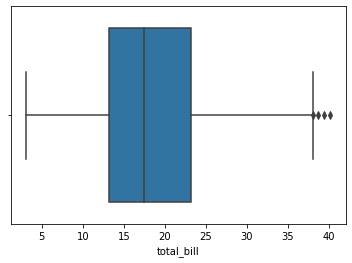

In [21]:
sns.boxplot(df2['total_bill'])

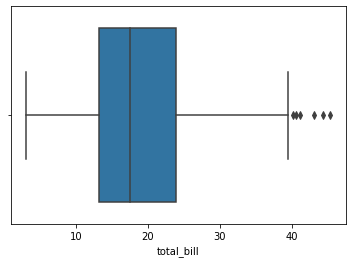

In [22]:
sns.boxplot(df3['total_bill'])

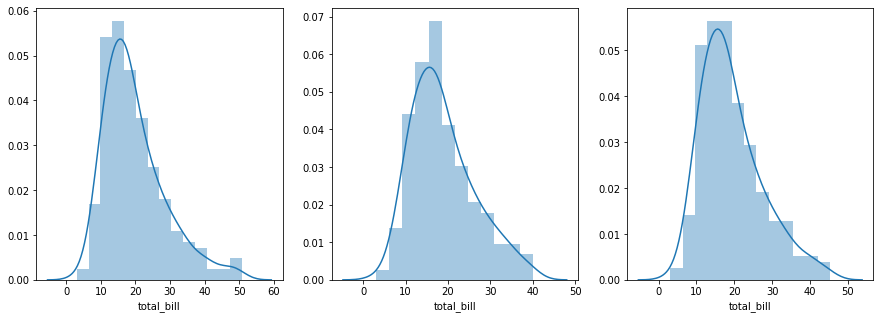

In [24]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.distplot(df['total_bill'],ax=axes[0])
sns.distplot(df2['total_bill'],ax=axes[1])
sns.distplot(df3['total_bill'],ax=axes[2])